In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import njit
import matplotlib.patheffects as fx
import seaborn as sns
import matplotlib.animation as animation
from fun import *

In [2]:
def idx1D(i , j, N):
        return i * N + j

@njit
def generateMatrix(Nx,Ny,dx,dy,n,k):
    def idx1D(i , j, N):
        return i * N + j

    matrix = np.zeros((Nx**2,Ny**2))

    for i in range(Nx):
        for j in range(Ny):
            matrix[idx1D(i, j, Nx), idx1D(i, j, Ny)] = -2/dx**2 -2/dy**2 + k**2/n[i,j]**2

    for i in range(Nx):
        for j in range(1,Ny):
            matrix[idx1D(i, j, Nx), idx1D(i, j - 1, Ny)] = 1/dy**2

    for i in range(Nx):
        for j in range(Ny-1):
            matrix[idx1D(i, j, Nx), idx1D(i, j + 1, Ny)] = 1/dy**2

    for i in range(Nx-1):
        for j in range(Ny):
            matrix[idx1D(i, j, Nx), idx1D(i + 1, j, Ny)] = 1/dx**2

    for i in range(1,Nx):
        for j in range(Ny):
            matrix[idx1D(i, j, Nx), idx1D(i - 1, j, Ny)] = 1/dx**2
    return matrix

@njit
def to2D(E,Nx,Ny):
    E_2D = np.zeros((Nx,Ny))
    for j in range(np.sqrt(len(E))):
        E_2D[j] = E[j*Nx:(j+1)*Nx]
    return E_2D

# @njit
def generateFild(Nx,Ny,dx,dy,n,k,f):
    matrix = generateMatrix(Nx,Ny,dx,dy,n,k)
    E = np.linalg.solve(matrix, f)
    E_2D = to2D(E,Nx,Ny)
    return E_2D

In [3]:
Nx = 81
Ny = 81
dx = 0.01
dy = 0.01
k = 6.28/0.12 #2pi/długość fali
n = np.ones((Nx,Ny))
f = np.zeros((Nx**2))
f[Nx**2//2] = 1

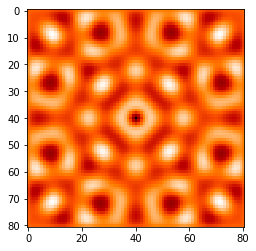

In [4]:
plt.imshow(generateFild(Nx,Ny,dx,dy,n,k,f),'gist_heat')

(169, 121)
169


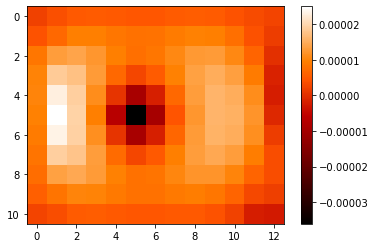

In [4]:
x = 11
y = 13
Ny = y if y > x else x
Nx = x if y > x else y
dx = 0.01
dy = 0.01
k = 6.28/0.12 #2pi/długość fali
n = np.ones((Nx,Ny))
f = np.zeros((Nx**2))
f[Nx**2//2] = 1

E_2D_test = np.zeros((Nx,Ny))

matrix = generateMatrix(Nx,Ny,dx,dy,n,k)
matrix_inv = np.linalg.pinv(matrix)         # Pseudoinverse
print(np.shape(matrix_inv))
E_test = np.matmul(matrix_inv, f)
print(len(E_test))
E_2D_test = np.reshape(E_test,(Ny,Ny))[:(Nx-Ny)]
plt.imshow(E_2D_test, 'gist_heat')
plt.colorbar()

generatinf matrix...
pseudoinverting matrix...
reshaping matrix...
(576, 441)
multiplication...
reshaping result...
generate ing...
saving img...


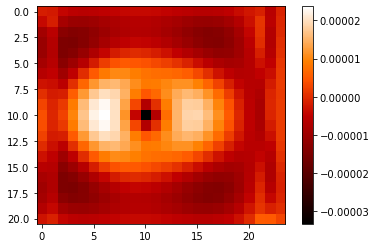

In [4]:
x = 21
y = 24
Ny = y if y > x else x
Nx = x if y > x else y
dx = 0.01
dy = 0.01
k = 6.28/0.12 #2pi/długość fali
n = np.ones((Nx,Ny))
f = np.zeros((Nx**2))
f[Nx**2//2] = 1
E_2D_test = np.zeros((Nx,Ny))

print('generatinf matrix...')
matrix = generateMatrix(Nx,Ny,dx,dy,n,k)
print('pseudoinverting matrix...')
matrix_inv = pinv(matrix)         # Pseudoinverse
print('reshaping matrix...')
print(np.shape(matrix_inv))
print('multiplication...')
E_test = matmul(matrix_inv, f)
print('reshaping result...')
if Nx != Ny:
    E_2D_test = np.reshape(E_test,(Ny,Ny))[:(Nx-Ny)]
    print('generate ing...')
    plt.imshow(E_2D_test, 'gist_heat')
    plt.colorbar()
    print('saving img...')
    plt.savefig('test.png')
else:
    E_2D_test = np.reshape(E_test,(Ny,Ny))
    print('generate ing...')
    plt.imshow(E_2D_test, 'gist_heat')
    plt.colorbar()
    print('saving img...')
    plt.savefig('test.png')